In [22]:
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
from scipy.io import FortranFile

sys.path.append('/glade/work/juliob/PyRegridding/Utils/')
sys.path.append('/glade/work/juliob/PyRegridding/Regridder/')

import GridUtils as GU
import esmfRegrid as erg

importlib.reload( GU )




<module 'GridUtils' from '/glade/work/juliob/PyRegridding/Utils/GridUtils.py'>

In [2]:
######

f1='/glade/campaign/cesm/cesmdata/inputdata/share/meshes/tx2_3v2_230415_ESMFmesh.nc'

f2='/glade/work/gmarques/cesm/tx2_3/mesh/tx2_3_SCRIP_230415.nc'

In [3]:
####################

X1=xr.open_dataset( f1 )
X2=xr.open_dataset( f2 )

In [4]:
X1

<xarray.Dataset>
Dimensions:         (origGridRank: 2, nodeCount: 259448, coordDim: 2,
                     elementCount: 259200, maxNodePElement: 4)
Dimensions without coordinates: origGridRank, nodeCount, coordDim,
                                elementCount, maxNodePElement
Data variables:
    origGridDims    (origGridRank) int32 ...
    nodeCoords      (nodeCount, coordDim) float64 ...
    elementConn     (elementCount, maxNodePElement) float64 ...
    numElementConn  (elementCount) int32 ...
    centerCoords    (elementCount, coordDim) float64 ...
    elementArea     (elementCount) float64 ...
    elementMask     (elementCount) int32 ...
Attributes:
    gridType:       unstructured mesh
    version:        0.9
    inputFile:      tx2_3_SCRIP_230415.nc
    timeGenerated:  Fri Apr 14 10:48:35 2023

In [5]:
X2

<xarray.Dataset>
Dimensions:          (grid_rank: 2, grid_size: 259200, grid_corners: 4)
Dimensions without coordinates: grid_rank, grid_size, grid_corners
Data variables:
    grid_dims        (grid_rank) int32 ...
    grid_center_lat  (grid_size) float64 ...
    grid_center_lon  (grid_size) float64 ...
    grid_imask       (grid_size) int32 ...
    grid_corner_lat  (grid_size, grid_corners) float64 ...
    grid_corner_lon  (grid_size, grid_corners) float64 ...
    grid_area        (grid_size) float64 ...
Attributes:
    date_created:  Fri Apr 14 10:45:18 MDT 2023
    Createdby:     ESMF_regridding.ncl
    Conventions:   SCRIP
    title:         Global 2/3 degree MOM6 grid

In [6]:
print( np.shape(X1.centerCoords))

(259200, 2)


In [7]:
print( X1.centerCoords.values[0,:] )
print( X2.grid_center_lon.values[0] , X2.grid_center_lat.values[0] )

[-286.66666667  -81.55812493]
-286.66666666666663 -81.55812493176025


In [8]:
####################
case = "test2.02"
BaseDir = "/glade/derecho/scratch/juliob/archive/"

#####################
Src     = 'ne30pg3'
SrcDir  = BaseDir+case+'/atm/hist/'
SrcFile = SrcDir + case + '.cam.h0.2000-01.nc'


In [9]:
src_scrip, src_Hkey, src_type = GU.scrip_etc( grid=Src)
print(src_type)

mesh


In [12]:
dst_scrip = f2
dst_type='mesh'

In [25]:

regrd, srcf, dstf = erg.Regrid( srcScrip = src_scrip , 
                                srcType  = src_type  ,
                                dstScrip = dst_scrip ,
                                dstType  = dst_type  ,
                                RegridMethod = 'CONSERVE')


Generating regridding weights. Method CONSERVE : ESMF method= 2


In [17]:

XX=xr.open_dataset( SrcFile )
ts=XX.TS.values[0,:]
ts.shape

(48600,)

In [26]:
#####
ts_Dst = erg.HorzRG( aSrc = ts , 
            regrd = regrd , 
            srcField= srcf , 
            dstField= dstf , 
            srcGridkey= 'c' ,
            dstGridkey= 'c' )


In [23]:
lat,lon=GU.latlon(scrip=dst_scrip,Hkey='c')

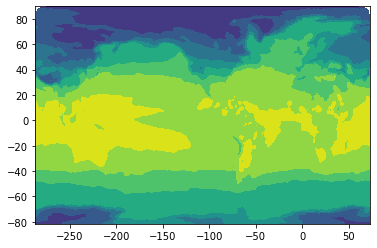

In [27]:
plt.tricontourf( lon,lat,ts_Dst)

In [28]:
####

import ESMF as E


In [29]:
print(E.__file__)

/glade/u/apps/opt/conda/envs/npl-2022b/lib/python3.8/site-packages/ESMF/__init__.py


In [30]:
help(E)


Help on package ESMF:

NAME
    ESMF

DESCRIPTION
    ESMPy is a Python interface to the Earth System Modeling Framework (ESMF) 
    regridding utility. ESMF is software for
    building and coupling weather, climate, and related models. ESMF has a robust,
    parallel and scalable remapping package, used to generate remapping weights.
    It can handle a wide variety of grids and options: logically rectangular grids,
    unstructured meshes and sets of unconnected points; regional or global grids;
    2D or 3D; and pole and masking options. ESMF also has capabilities to read grid
    information from NetCDF files in a variety of formats, including the
    `Climate and Forecast (CF) V1.6 (a.k.a GridSpec) <http://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html>`_,
    `UGRID <https://github.com/ugrid-conventions/ugrid-conventions>`_,
    ESMF Unstructured and SCRIP conventions. Information on these last two conventions
    can be found in the
    `ESMF Reference Manual <http

In [31]:
import esmpy as E

ModuleNotFoundError: No module named 'esmpy'